In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1 align="center"><b><u>Lecture 1 - The Monte Carlo Method</u></b></h1>

<h2>Monte Carlo Estimate of an Integral</h2>

As we have seen from lecture 1, we are able to use the Monte Carlo method to approximate integrals.  To demonstrate the use of the Monte Carlo method, the area under a decaying exponential is approximated, and the estimate compared to the true area that can be found analytically.

Firstly, the function to be integrated is defined on the unit line $[0,1]$, and is zero elsewhere: 

$$ f(x) = \exp(-x) $$  



In [2]:
def f(x): return np.exp(-x)

The area, $A$ will be defined as the area under this function along the unit line, i.e. 

$$ A = \int_{0}^{1}f(x)dx$$

This area is available exactly ($A = 1-\frac{1}{e} \approx 0.6321$). This will allow us to compare the Monte Carlo estimate to the true value.  In practice, the Monte Carlo method is used when things are not available analytically. 

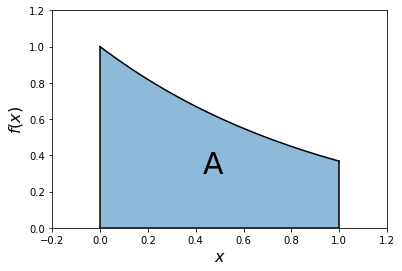

In [16]:
x = np.linspace(0,1,100)
y = f(x)

## Plotting
plt.plot(x,y,color='k')
plt.xlim(-0.2,1.2)
plt.ylim(0,1.2)
plt.fill_between(x,y,alpha=0.5)
plt.plot((0,0),(0,1),color='k')
plt.plot((1,1),(0,np.exp(-1)),color='k')
plt.plot((0,1),(0,0),color='k')
plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$f(x)$",fontsize=16)
plt.annotate("A",xy=(0.45,0.25),xycoords="axes fraction",fontsize=30)
plt.show()

Consider the expectation of $f(x)$ w.r.t the density $p(x)$:

$$\mathbb{E} \{ f(X) \} = \int f(x) p(x) dx
$$

Now if $p(x)$ is defined as the uniform on $[0,1]$, this expectaiton is the area $A$.

$$ p(x) = \begin{cases}
1 &  0 \leq x \leq 1\\
0 &  \text{otherwise}
\end{cases}
$$

$$\mathbb{E} \{ f(X) \} = \int_{0}^{1} f(x) dx = A
$$

Now the Monte Carlo method can be used to estimate this expectation:

$$
A^{*} = \frac{1}{N} \sum_{i=1}^{N} f(X^{i})
$$

where each $X^{i} \sim p(x)$.

The uniform sampler on $[0,1]$ is setup easily:


In [4]:
from scipy.stats import uniform

px = uniform.rvs

A Monte Carlo estimate for $A$ is found with $N=100$.  Re-run the following cell to see how the estimate varies depending on the random samples that are drawn.  Change N and see how the accuracy of the estimate changes.

In [5]:
N = 100
samples = px( size=N )                # N samples are drawn from the uniform density px

A_estimate = sum( f(samples) ) / N    # This is the Monte Carlo estimate
A = 1-np.exp(-1)                      # This is the true value of A

print("True Area: {}, Estimated Area: {}".format(round(A,4),round(A_estimate,4)))

True Area: 0.6321, Estimated Area: 0.6451


<h2>Central Limit Theorem for Monte Carlo</h2>

The estimate for the area is dependent on the random samples drawn $\{X^{i}\}_{i=1}^N$, and the number of samples drawn, $N$.  From the Lecture, this estimate is found to be normally distributed about the true value, with a variance which depends on $N$ and the variance of the function $f$.


$$\frac{1}{N} \sum_{i=1}^{N} f(X^{i}) \sim \mathcal{N} \left( \mathbb{E} \{ f(X) \}, 
\frac{\sigma_{f}^{2}}{N} \right) $$


This can be demonstrated by repeatedly forming Monte Carlo estimates, and displaying the estimates as a histogram to observe their distribution.  Also, the true density can be found exactly, because we can find $\sigma_{f}^{2}$ analytically.

$$\mathbb{E} \{ f(X) \} = 1 - e^{-1}$$
$$\sigma_{f}^{2} = \int \left( f(x) - \mathbb{E} \{ f(X) \} \right)^2 dx
= -\frac{1}{2} + \frac{2}{e} - \frac{3}{2e^2} \approx 0.03276$$
$$\frac{1}{N} \sum_{i=1}^{N} f(X^{i}) \sim \mathcal{N} \left( 0.6321, 
\frac{0.03276}{N} \right) $$

In [6]:
def MCE(N):  return sum( f(px(size=N)) ) / N       # Returns the Monte Carlo Estimate using N samples

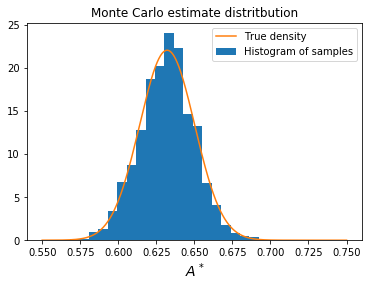

In [7]:
from scipy.stats import norm

n = 1000    # This is the number of MC estimates to run to get reasonable approx to the ditribution
estimates = [ MCE(N) for _ in range(n)]

# Plot histogram of the Monte Carlo estimates that have been taken
plt.hist(estimates,bins=20,density=True,label="Histogram of samples")

# Compare this to the true density found analytically
x = np.linspace(0.55,0.75,1000)
sigma_f2 = (-1/2) + (2*np.exp(-1)) + (-1*(3/2)*np.exp(-2))

# Here, loc is the mean and scale is the standard deviation of the Gaussian density
plt.plot(x,norm.pdf(x,loc=A,scale=np.sqrt(sigma_f2/N)),label="True density")

## Plotting
plt.legend()
plt.title("Monte Carlo estimate distritbution")
plt.xlabel(r"$A^*$",fontsize=14)
plt.show()

The repeated sampling shows the Monte Carlo estimate following the distribution devirived analytically from the Central Limit Theorem, practically validating this approach.

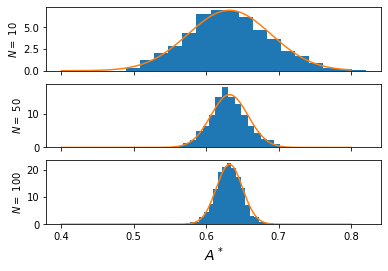

In [8]:
Ns = [10,50,100]
Es = []

# Generate estimates for varying N
for N in Ns:
    # Form many Monte Carlo Estimates, each using N samples
    Es.append( [ MCE(N) for _ in range(n)] )

##Plotting
fig, axs = plt.subplots(3,1,sharex=True)
x = np.linspace(0.4,0.8,1000)
    
for i , N in enumerate(Ns):
    axs[i].hist(Es[i],bins=20,density=True,label="Histogram of samples")
    axs[i].plot(x,norm.pdf(x,loc=A,scale=np.sqrt(sigma_f2/N)),label="True density")
    axs[i].set_ylabel(r"$N =$ {}".format(N),)
plt.xlabel(r"$A^*$",fontsize=14)
plt.show()

The variance of the Gaussian distribution is decaying at a rate of $\frac{\sigma_f}{\sqrt{N}}$.

In [9]:
Vs = [ np.var(e) for e in Es]    # Calculating the variances for the estimates for varying N

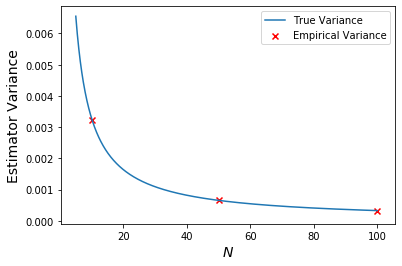

In [10]:
# Plot the true variance for the MC estimates with the empirical variances from our sampling
x = np.linspace(5,100,1000)
g = lambda N: sigma_f2/N   # True variance for N samples

## Plotting
plt.plot(x,g(x),label="True Variance")
plt.scatter(Ns,Vs,label="Empirical Variance",marker="x",color="r")
plt.ylabel("Estimator Variance",fontsize=14)
plt.xlabel(r"$N$",fontsize=14)
plt.legend()
plt.show()